###**Modules**









---



In [ ]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 7.8 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11954 sha256=1d1b486e82031fa14e118552ea837bf6998067bc8862471f05f79acefef02395
  Stored in directory: /root/.cache/pip/wheels/48/8c/93/3afb1916772591fe6bcc25cdf8b1c5bdc362f0ec8e2f0fd413
Successfully built stopit


In [ ]:
# Data Manipulation Tools
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

# Data splitting methods
from sklearn.model_selection import train_test_split

# TPOT
from tpot import TPOTClassifier

# Model Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

### **General Settings**

---



In [ ]:
# Display all columns in Pandas
pd.set_option('display.max_columns', None)

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

### **Loading the Data**

In [ ]:
def read_csv_pandas(file_path, encoding="utf-8"):
    """
    Read a CSV file using Pandas and return a DataFrame.

    Parameters
    ----------
    file_path : str
        Path to the CSV file.
    encoding : str, optional
        The encoding of the CSV file. Default is 'utf-8'.

    Returns
    -------
    df : pandas.DataFrame
        The DataFrame object containing the data from the CSV file.

    Notes
    -----
    If 'utf-8' doesn't work, try 'unicode_escape'.
    """
    # Read file with default encoding utf-8
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print("File has been loaded.")

    # If encoding doesn't work, print the exception with custom statement
    except UnicodeDecodeError as e:
        print(f"Error: Unable to decode the file with the specified encoding:\n {e}")
        return None

    return df

file_path = "/content/drive/MyDrive/Colab Notebooks/hospital_diabetes_dataset.csv"

df = read_csv_pandas(file_path)

File has been loaded.


### **First Look at the Data**



---



In [ ]:
# Head of the Data
df.head()

# All columns contains integers.

,Pregnancies,AmountofGlucose,Pressureofblood,Thicknessofskin,amountofInsulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Five random samples
df.sample(n=5)

,Pregnancies,AmountofGlucose,Pressureofblood,Thicknessofskin,amountofInsulin,BMI,DiabetesPedigree,Age,Outcome
738,2,99,60,17,160,36.6,0.453,21,0
562,1,87,68,34,77,37.6,0.401,24,0
389,3,100,68,23,81,31.6,0.949,28,0
9,8,125,96,0,0,0.0,0.232,54,1
720,4,83,86,19,0,29.3,0.317,34,0


In [ ]:
# Shape of the data
print(f"Dataset has {df.shape[0]} rows, and {df.shape[1]} columns.")

# It is not an extensive data.

Dataset has 768 rows, and 9 columns.


In [ ]:
# Statistics
df.describe().T

# Some values seems quite off such as 846 for amount of insulin, or 17 for pregnancies.
# Some values being 0 indicates that we have zeros in our data which we will have to fill.

,count,mean,std,min,25%,50%,75%,max
pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
amountofglucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pressureofblood,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
thicknessofskin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
amountofinsulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
diabetespedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### **Check Data Types**

---



In [ ]:
# Check data types with .info()
df.info()

# Even though all columns are numerical type, I think pregnancies could be thought
# of as a categorical data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       768 non-null    int64  
 1   AmountofGlucose   768 non-null    int64  
 2   Pressureofblood   768 non-null    int64  
 3   Thicknessofskin   768 non-null    int64  
 4   amountofInsulin   768 non-null    int64  
 5   BMI               768 non-null    float64
 6   DiabetesPedigree  768 non-null    float64
 7   Age               768 non-null    int64  
 8   Outcome           768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### **Column Names**

---



In [ ]:
# Standardizing Column Names

def standardize_column_names(df):

    """
    Standardize column names of a Pandas DataFrame.

    Parameters
    ----------
    df : pandas.DataFrame
        The DataFrame whose column names are to be standardized.

    Returns
    -------
    pandas.Index
        The standardized column names as a Pandas Index object.
    """
    # Remove leading and trailing spaces
    df.columns = df.columns.str.strip()

    # Replace spaces with underscores
    df.columns = df.columns.str.replace(' ', '_')

    # Remove special characters
    df.columns = df.columns.str.replace('[^\w\s]', '_', regex=True)

    # Lowercase all characters
    df.columns = df.columns.str.lower()

    print("Column names have been standardized!\n")

    return df.columns

# Standardize
standardize_column_names(df)

Column names have been standardized!



Index(['pregnancies', 'amountofglucose', 'pressureofblood', 'thicknessofskin',
       'amountofinsulin', 'bmi', 'diabetespedigree', 'age', 'outcome'],
      dtype='object')

### **Duplicates**

---



In [ ]:
# Detecting Duplicates in Data

# Note: Not every duplicate should be dropped.

def find_duplicates(df):
    """
    Find duplicated rows in a pandas DataFrame.

    Parameters
    ----------
    df : pandas DataFrame
        The DataFrame to search for duplicates.

    Returns
    -------
    pandas DataFrame
        A new DataFrame containing all duplicated rows in the input DataFrame.

    Raises
    ------
    TypeError
        If the input argument is not a pandas DataFrame.
    """
    # Check dataframe
    if not isinstance(df, pd.DataFrame):
        raise TypeError("Input argument must be a pandas DataFrame.")

    # Find the number of duplicates
    num_duplicates = df.duplicated().sum()
    print(f"There are {num_duplicates} duplicates in the data.")
    
    # Extract all duplicated rows into a new DataFrame
    df_duplicates = df[df.duplicated(keep="first")]
    
    return df_duplicates

# Find duplicates
df_duplicates = find_duplicates(df)

There are 0 duplicates in the data.


### **Unique Values**

---



In [ ]:
# Unique Values Columns

def print_unique_values(df, max_unique=10):
    """
    Prints the number of unique values in each categorical column of a Pandas dataframe.
    If a column has more than max_unique unique values, only the first max_unique are displayed,
    followed by "etc." to indicate that there are more unique values not shown.
    
    Parameters:
    -----------
    df : Pandas dataframe
        The dataframe for which to print the unique values.
    max_unique : int, default=5
        The maximum number of unique values to display for each column.
    """
    # Define an index
    index=1

    # Identify categorical columns
    cat_columns = df.select_dtypes(include=['int', 'float']).columns

    # Loop over categorical columns
    for col in cat_columns:

        # Find unique values and their amount
        unique_vals = df[col].unique()
        n_unique = len(unique_vals)

        # If a column has more unique elements than max_unique, take only a part of it
        if n_unique > max_unique:
            unique_vals = unique_vals[:max_unique]
            # Append 'etc' at the end
            unique_vals = np.append(unique_vals, 'etc.')

        # Report
        print(f"{index}. {col} has {n_unique} unique values: {unique_vals.tolist()}")

        index += 1

# Check unique values
print_unique_values(df, max_unique=10)

1. pregnancies has 17 unique values: ['6', '1', '8', '0', '5', '3', '10', '2', '4', '7', 'etc.']
2. amountofglucose has 136 unique values: ['148', '85', '183', '89', '137', '116', '78', '115', '197', '125', 'etc.']
3. pressureofblood has 47 unique values: ['72', '66', '64', '40', '74', '50', '0', '70', '96', '92', 'etc.']
4. thicknessofskin has 51 unique values: ['35', '29', '0', '23', '32', '45', '19', '47', '38', '30', 'etc.']
5. amountofinsulin has 186 unique values: ['0', '94', '168', '88', '543', '846', '175', '230', '83', '96', 'etc.']
6. bmi has 248 unique values: ['33.6', '26.6', '23.3', '28.1', '43.1', '25.6', '31.0', '35.3', '30.5', '0.0', 'etc.']
7. diabetespedigree has 517 unique values: ['0.627', '0.351', '0.672', '0.167', '2.288', '0.201', '0.248', '0.134', '0.158', '0.232', 'etc.']
8. age has 52 unique values: ['50', '31', '32', '21', '33', '30', '26', '29', '53', '54', 'etc.']
9. outcome has 2 unique values: [1, 0]


### **Data Imbalance**

---



Not imbalanced data:
         the minority class represents 34.9% of the total instances, more than 15%.



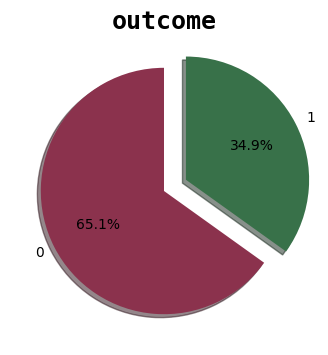

In [ ]:
# Check if the data is balanced or not.

def check_imbalance(df, column_name, target_colors=['#8b324d','#387149']):

    """
    Checks if the target variable in a Pandas DataFrame is imbalanced.

    Args:
        target_name (str): The name of the target variable to check.
        df (pandas.DataFrame): The DataFrame containing the target variable.

    Returns:
        None.
    """

    # Count the number of instances of each class
    target_counts = df[column_name].value_counts()

    # Calculate the proportion of the minority class
    minority_proportion = target_counts.min() / target_counts.sum()

    # Check if the minority class represents less than 15% of the total instances
    if minority_proportion < 0.15:
        print(f"Imbalanced data:\n\
         the minority class represents {round(minority_proportion*100, 2)}% of the total instances, less than 15%.\n")
    else:
        print(f"Not imbalanced data:\n\
         the minority class represents {round(minority_proportion*100, 2)}% of the total instances, more than 15%.\n")

    # Plot a pie chart of the target variable
    explode = (0,0.2)

    plt.figure(figsize=(4,4))

    plt.pie(target_counts, explode=explode, labels=target_counts.index,
            autopct='%1.1f%%', shadow=True, startangle=90,
            colors = target_colors)

    plt.title(column_name, fontsize=18,
              weight='bold', fontname = 'monospace')
    
    plt.show()

# Check imbalance
check_imbalance(df, column_name='outcome')

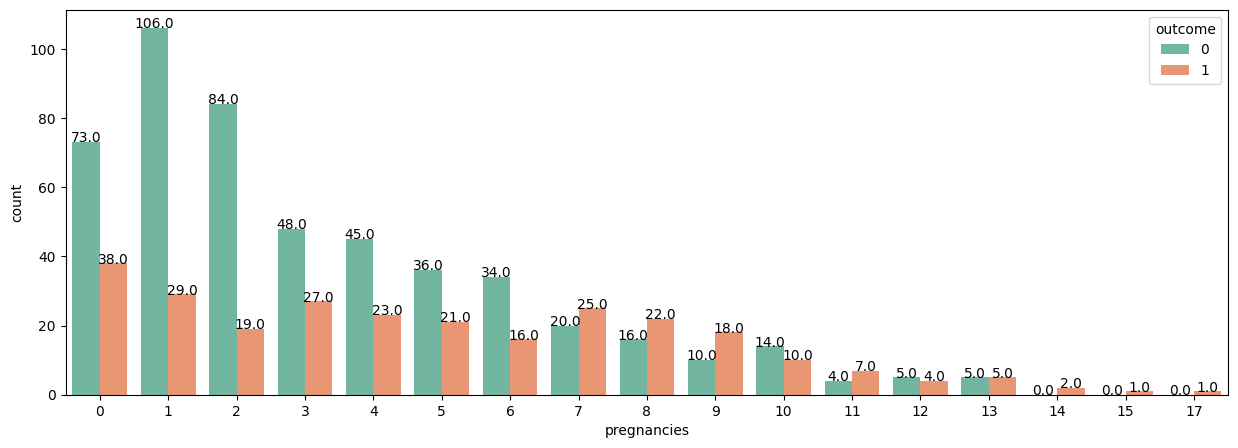

In [ ]:
# Pregnancies and Outcome

def plot_counts(df, x, hue):

    '''
    Plots a countplot for categorical data using seaborn's 'countplot'.

    Args:
        df (pandas.DataFrame): The DataFrame to pull columns from.
        x (str): String of the column name for x-axis.
        hue (str): String for hue parameter of countplot.

    Returns:
        None
    '''

    # Plot size
    plt.subplots(figsize=(15, 5))

    # Countplot
    ax = sns.countplot(x=x, hue=hue, palette='Set2', data=df)

    # Write the count numbers on top of bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plot_counts(df, 'pregnancies', 'outcome')

# It seems higher birth count may have an effect on the outcome however data
# is very few at there so we shouldn't jump to any conclusions yet.

### **Missing Values**

---



In [ ]:
def find_missing_values(df):

    """
    Finds categorical and numerical columns with missing values in a Pandas dataframe.

    Args:
        df (pandas.DataFrame): Input dataframe to check for missing values.
        
    Returns:
        None.
    """

    # Get list of categorical and numerical columns
    cat_cols = list(df.select_dtypes(include=['object', 'category']).columns)
    num_cols = list(df.select_dtypes(include=['int', 'float']).columns)

    # Check for missing values in categorical columns
    cat_missing = [
        (col, round(df[col].isnull().mean() * 100, 2))
         for col in cat_cols if df[col].isnull().any()
         ]

    # Report missing values
    if cat_missing:
        print(f"There are {len(cat_missing)} categorical column with missing values:")
        for col, percentage in cat_missing:
            print(f"{col} - {percentage}%")
    else:
        print("No missing values found in categorical columns.\n")

    # Check for missing values in numerical columns
    num_missing = [
        (col, round(df[col].isnull().mean() * 100, 2))
         for col in num_cols if df[col].isnull().any()
         ]

    # Report missing values     
    if num_missing:
        print(f"There are {len(num_missing)} numerical column with missing values:")
        for col, percentage in num_missing:
            print(f"{col} - {df[col].isnull().sum()} rows missing - {percentage}%")
    else:
        print("No missing values found in numerical columns")

# Find missing values
find_missing_values(df)

# Fill missing values with median
#df['arrival_delay_in_minutes'].fillna(
#    df['arrival_delay_in_minutes'].median(axis=0),
#     inplace=True
#     )
#print("\nMissing values have been replaced with the median.")

No missing values found in categorical columns.

No missing values found in numerical columns


### **Correlation Analysis**

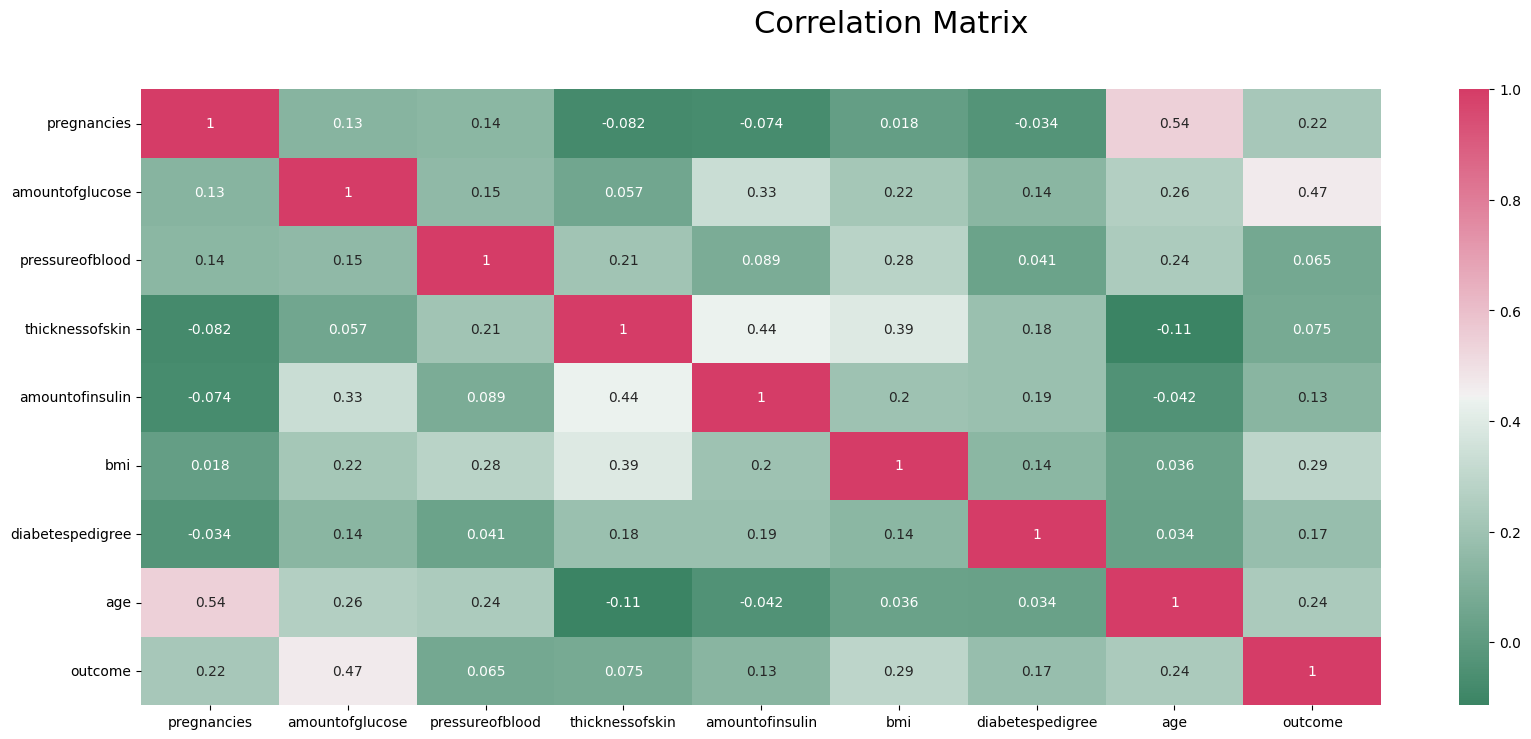

In [ ]:
# Correlation Analysis

# Create a figure and a set of subplots
fig = plt.subplots(figsize=(20,8))

# Set a centered title
plt.suptitle('Correlation Matrix', fontsize=22)

# Heatmap
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap=cmap)

plt.show()

# There is not significant correlation between features and target.
# Lower correaltion between age and pregnancies is expected since older woman
# is likely to have higher birth counts.

### **TPOT**

---



In [ ]:
# Let's use an autoML package TPOT

In [ ]:
# At this stage we can split the data.

# Create features and target
X = df.drop('outcome', axis=1)
Y = df['outcome']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=42)

print("Shape of training set:", x_train.shape)
print("Shape of test set:", x_test.shape)

Shape of training set: (614, 8)
Shape of test set: (154, 8)


In [ ]:
# TPOT Classifier
model = TPOTClassifier(generations=5, population_size=200, verbosity=2, cv = 10)
model.fit(x_train, y_train)

Optimization Progress:   0%|          | 0/1200 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7786356425171868

Generation 2 - Current best internal CV score: 0.7817821258593337

Generation 3 - Current best internal CV score: 0.7850079323109466

Generation 4 - Current best internal CV score: 0.7850079323109466

Generation 5 - Current best internal CV score: 0.7850343733474353

Best pipeline: RandomForestClassifier(MultinomialNB(input_matrix, alpha=10.0, fit_prior=True), bootstrap=True, criterion=gini, max_features=0.4, min_samples_leaf=6, min_samples_split=6, n_estimators=100)


TPOTClassifier(cv=10, generations=5, population_size=200, verbosity=2)

In [ ]:
# Some notes:

# Best pipeline is bootstrapping random forest classifier with multinomial naive bayes.

# Modelscore is not high however considering that we have not performed
# any scaling or normalization before, this is not bad.

# We could also over samplify the outcome so that data is more balanced which can 
# also help improving the accuracy.

In [ ]:
# Check score on the test set

model.score(x_test, y_test)

0.7532467532467533

In [ ]:
# Predict test set
y_pred = model.predict(x_test)

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[80, 19],
       [19, 36]])

In [ ]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



<Axes: >

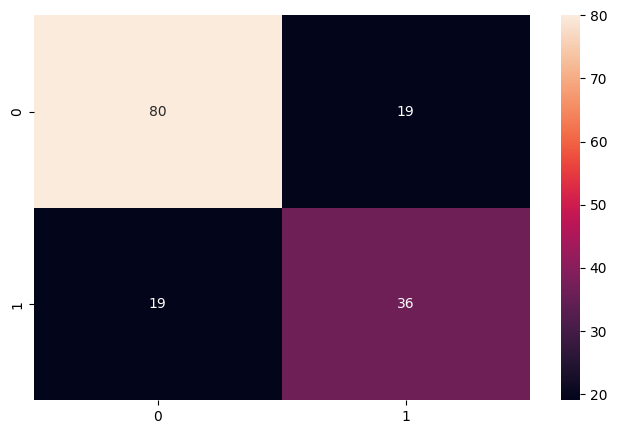

In [ ]:
# Heatmap of confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d')